In [200]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [201]:
os.getcwd()

'/Users/mahtablashgari/Desktop/GemeinsamRepository/Skin_cancer_diagnosis_tool/Dataset/dataverse_files'

In [202]:
data = pd.read_csv('HAM10000_metadata.csv')
print("missing value:")
print(data.isna().sum()) 

missing value:
lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dataset          0
dtype: int64


In [203]:
imputer = SimpleImputer(strategy='mean')
data['age'] = imputer.fit_transform(data[['age']])

label_encoder_sex = LabelEncoder()
data['sex'] = label_encoder_sex.fit_transform(data['sex'])

label_encoder_localization = LabelEncoder()
data['localization'] = label_encoder_localization.fit_transform(data['localization'])

dx_classes = {'nv': 0 , 'mel': 6, 'bkl': 3, 'bcc': 4, 'vasc': 2, 'akiec': 5, 'df': 1}
data['Class'] = data['dx'].map(dx_classes)

X = data[['age', 'sex', 'localization']]
y = data['Class']


In [204]:
data['Class'].value_counts()

Class
0    6705
6    1113
3    1099
4     514
5     327
2     142
1     115
Name: count, dtype: int64

In [205]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder, label_binarize
import pandas as pd
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data['age'] = imputer.fit_transform(data[['age']])

label_encoder_sex = LabelEncoder()
data['sex'] = label_encoder_sex.fit_transform(data['sex'])

label_encoder_localization = LabelEncoder()
data['localization'] = label_encoder_localization.fit_transform(data['localization'])

dx_classes = {'nv': 0, 'mel': 6, 'bkl': 3, 'bcc': 4, 'vasc': 2, 'akiec': 5, 'df': 1}
data['Class'] = data['dx'].map(dx_classes)

X = data[['age', 'sex', 'localization']]
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Modell 1: Random Forest
model_RF = RandomForestClassifier(random_state=42)
model_RF.fit(X_train_resampled, y_train_resampled)
y_pred_RF = model_RF.predict(X_test)
y_pred_proba_RF = model_RF.predict_proba(X_test)

# Modell 2: Gradient Boosting
model_GB = GradientBoostingClassifier(random_state=42)
model_GB.fit(X_train_resampled, y_train_resampled)
y_pred_GB = model_GB.predict(X_test)
y_pred_proba_GB = model_GB.predict_proba(X_test)

# Modell 3: Support Vector Machine (SVM)
model_SVM = SVC(probability=True, random_state=42)
model_SVM.fit(X_train_resampled, y_train_resampled)
y_pred_SVM = model_SVM.predict(X_test)
y_pred_proba_SVM = model_SVM.predict_proba(X_test)

# Modell 4: K-Nearest Neighbors (KNN)
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_resampled, y_train_resampled)
y_pred_KNN = model_KNN.predict(X_test)
y_pred_proba_KNN = model_KNN.predict_proba(X_test)

models = {
    "RF": (y_pred_RF, y_pred_proba_RF),
    "Gradient Boosting": (y_pred_GB, y_pred_proba_GB),
    "SVM": (y_pred_SVM, y_pred_proba_SVM),
    "KNN": (y_pred_KNN, y_pred_proba_KNN)
}

# Binarisierung der Zielvariable für ROC-AUC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])

for model_name, (y_pred, y_pred_proba) in models.items():
    print(f"\nModell: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classifikation report:")
    print(classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, multi_class="ovr")
    print(f"ROC-AUC-Score: {roc_auc}")



Modell: RF
Genauigkeit: 0.4073889166250624
Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.92      0.48      0.63      1341
           1       0.04      0.61      0.08        23
           2       0.05      0.39      0.09        28
           3       0.29      0.19      0.23       220
           4       0.15      0.34      0.21       103
           5       0.13      0.38      0.19        65
           6       0.20      0.18      0.19       223

    accuracy                           0.41      2003
   macro avg       0.26      0.37      0.23      2003
weighted avg       0.68      0.41      0.49      2003

ROC-AUC-Score: 0.7926640891664866

Modell: Gradient Boosting
Genauigkeit: 0.4038941587618572
Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.90      0.49      0.64      1341
           1       0.04      0.70      0.07        23
           2       0.05      0.36      0.09        28
 

In [206]:
joblib.dump(model_RF, 'new_model_RF.pkl')
joblib.dump(model_GB, 'new_model_GB.pkl')
joblib.dump(model_SVM, 'new_model_SVM.pkl')
joblib.dump(model_KNN, 'new_model_KNN.pkl')

['new_model_KNN.pkl']

In [190]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import label_binarize

# 1. Laden der AIM-Daten
aim_data = pd.read_csv('ISIC2018_Task3_Test_GroundTruth.csv')

 #2. Laden des Modells
loaded_model_RF = joblib.load('new_model_RF.pkl')
print(f"Random Forest Modelltyp: {type(loaded_model_RF)}")



Random Forest Modelltyp: <class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [191]:
print("Überprüfen auf fehlende Werte:")
print(aim_data.isna().sum())

Überprüfen auf fehlende Werte:
lesion_id         0
image_id          0
dx                0
dx_type           0
age             282
sex               1
localization      1
dataset           1
dtype: int64


In [192]:
aim_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     1512 non-null   object 
 1   image_id      1512 non-null   object 
 2   dx            1512 non-null   object 
 3   dx_type       1512 non-null   object 
 4   age           1230 non-null   float64
 5   sex           1511 non-null   object 
 6   localization  1511 non-null   object 
 7   dataset       1511 non-null   object 
dtypes: float64(1), object(7)
memory usage: 94.6+ KB


In [193]:
aim_data = aim_data.dropna()

In [194]:

aim_data['age'] = imputer.transform(aim_data[['age']])
aim_data['sex'] = label_encoder_sex.transform(aim_data['sex'])
aim_data['localization'] = label_encoder_localization.transform(aim_data['localization'])

dx_classes = {'nv': 0 , 'mel': 6, 'bkl': 3, 'bcc': 4, 'vasc': 2, 'akiec': 5, 'df': 1}
aim_data['Class'] = aim_data['dx'].map(dx_classes)


In [199]:
aim_data['Class'].value_counts()

Class
0    796
6    152
3    141
4     64
5     40
2     19
1     18
Name: count, dtype: int64

In [197]:


X_aim = aim_data[['age', 'sex', 'localization']]
y_aim = aim_data['Class']

y_aim_pred = loaded_model_RF.predict(X_aim)
y_aim_pred_proba = loaded_model_RF.predict_proba(X_aim)

accuracy = accuracy_score(y_aim, y_aim_pred)
print(f"Accuracy on AIM-Data: {accuracy}")

# ROC-AUC für Mehrklassenberechnung
y_aim_binarized = label_binarize(y_aim, classes=[0, 1, 2, 3, 4, 5, 6])
roc_auc = roc_auc_score(y_aim_binarized, y_aim_pred_proba, multi_class="ovr")
print(f"ROC-AUC on AIM-Data: {roc_auc}")

print("Classification Report on AIM-Data:")
print(classification_report(y_aim, y_aim_pred))

vergleich = pd.DataFrame({
    'Tatsächlicher Wert': y_aim,
    'Vorhergesagter Wert': y_aim_pred
})

print(vergleich.head(10))

Accuracy on AIM-Data: 0.38130081300813007
ROC-AUC on AIM-Data: 0.6961136334791184
Classification Report on AIM-Data:
              precision    recall  f1-score   support

           0       0.88      0.46      0.60       796
           1       0.05      0.56      0.09        18
           2       0.04      0.26      0.08        19
           3       0.19      0.11      0.14       141
           4       0.10      0.25      0.15        64
           5       0.15      0.42      0.23        40
           6       0.26      0.26      0.26       152

    accuracy                           0.38      1230
   macro avg       0.24      0.33      0.22      1230
weighted avg       0.63      0.38      0.46      1230

    Tatsächlicher Wert  Vorhergesagter Wert
0                    0                    0
1                    0                    6
2                    3                    4
3                    0                    0
4                    0                    3
6                    0

In [163]:
aim_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     1512 non-null   object 
 1   image_id      1512 non-null   object 
 2   dx            1512 non-null   object 
 3   dx_type       1512 non-null   object 
 4   age           1512 non-null   float64
 5   sex           1511 non-null   object 
 6   localization  1511 non-null   object 
 7   dataset       1511 non-null   object 
dtypes: float64(1), object(7)
memory usage: 94.6+ KB


In [108]:
# Datenvorverarbeitung ohne oversampling
imputer = SimpleImputer(strategy='mean')
data['age'] = imputer.fit_transform(data[['age']])

label_encoder_sex = LabelEncoder()
data['sex'] = label_encoder_sex.fit_transform(data['sex'])

label_encoder_localization = LabelEncoder()
data['localization'] = label_encoder_localization.fit_transform(data['localization'])

dx_classes = {'nv': 0 , 'mel': 6, 'bkl': 3, 'bcc': 4, 'vasc': 2, 'akiec': 5, 'df': 1}
data['Class'] = data['dx'].map(dx_classes)

X = data[['age', 'sex', 'localization']]
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Modell 1: RF
model_RF = RandomForestClassifier(random_state=42)
model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)
y_pred_proba_RF = model_RF.predict_proba(X_test)

# Modell 2: Gradient Boosting
model_GB = GradientBoostingClassifier(random_state=42)
model_GB.fit(X_train, y_train)
y_pred_GB = model_GB.predict(X_test)
y_pred_proba_GB = model_GB.predict_proba(X_test)

# Modell 3: Support Vector Machine (SVM)
model_SVM = SVC(probability=True, random_state=42)
model_SVM.fit(X_train, y_train)
y_pred_SVM = model_SVM.predict(X_test)
y_pred_proba_SVM = model_SVM.predict_proba(X_test)

# Modell 4: K-Nearest Neighbors (KNN)
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)
y_pred_KNN = model_KNN.predict(X_test)
y_pred_proba_KNN = model_KNN.predict_proba(X_test)

# Auswertung für alle Modelle
models = {
    "RF": (y_pred_RF, y_pred_proba_RF),
    "Gradient Boosting": (y_pred_GB, y_pred_proba_GB),
    "SVM": (y_pred_SVM, y_pred_proba_SVM),
    "KNN": (y_pred_KNN, y_pred_proba_KNN)
}

# Binarisierung der Zielvariable für ROC-AUC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])

for model_name, (y_pred, y_pred_proba) in models.items():
    print(f"\nModell: {model_name}")
    print("Genauigkeit:", accuracy_score(y_test, y_pred))
    print("Klassifikationsbericht:")
    print(classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, multi_class="ovr")
    print(f"ROC-AUC-Score: {roc_auc}")

    



Modell: RF
Genauigkeit: 0.7059410883674488
Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85      1338
           1       0.00      0.00      0.00        28
           2       1.00      0.05      0.09        21
           3       0.44      0.33      0.38       228
           4       0.30      0.09      0.13        93
           5       0.25      0.09      0.13        69
           6       0.34      0.10      0.16       226

    accuracy                           0.71      2003
   macro avg       0.44      0.23      0.25      2003
weighted avg       0.63      0.71      0.64      2003

ROC-AUC-Score: 0.8288085038901901

Modell: Gradient Boosting
Genauigkeit: 0.7039440838741887
Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.75      0.97      0.85      1338
           1       0.00      0.00      0.00        28
           2       0.00      0.00      0.00        21
 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [109]:
import joblib

# Speichern der Modelle
joblib.dump(model_RF, 'model_Random_Forest.pkl')
joblib.dump(model_GB, 'model_gradient_boosting.pkl')
joblib.dump(model_SVM, 'model_svm.pkl')
joblib.dump(model_KNN, 'model_knn.pkl')


['model_knn.pkl']

In [110]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score

y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])

models = {
    "RF": model_RF,
    "Gradient Boosting": model_GB,
    "SVM": model_SVM,
    "KNN": model_KNN
}

results = []

# Loop through each model for evaluation
for model_name, model in models.items():
     # Predictions for the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    # Calculate metrics for evaluation
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, multi_class="ovr")

    # Store the results in the list
    results.append({
        "Modell": model_name,
        "Genauigkeit": accuracy,
        "F1-Score": f1,
        "ROC-AUC-Score": roc_auc
    })
    
results_df = pd.DataFrame(results)
print(results_df.head())


              Modell  Genauigkeit  F1-Score  ROC-AUC-Score
0                 RF     0.705941  0.641709       0.828809
1  Gradient Boosting     0.703944  0.636592       0.833333
2                SVM     0.667998  0.535038       0.652275
3                KNN     0.677983  0.629808       0.688642


   Random Forest  Gradient Boosting       SVM       KNN
0       0.808400           0.800436  0.666011  0.693718
1       0.819974           0.809496  0.663563  0.679776
2       0.800924           0.808262  0.630782  0.695762
3       0.782891           0.804593  0.659713  0.674755
4       0.807673           0.795067  0.651424  0.681835


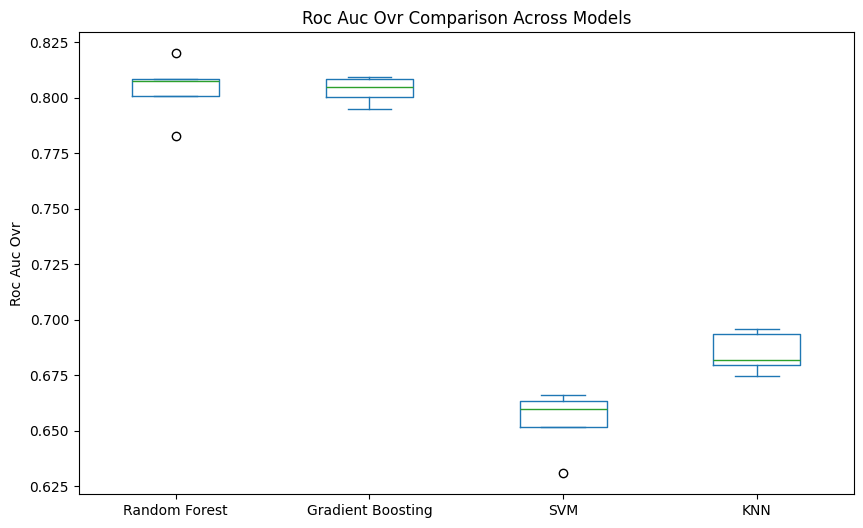

In [111]:
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt


scores_dict = {}

scoring_metric = "roc_auc_ovr"  

# Loop through each model and compute cross-validated scores
for pipe, name in zip([model_RF, model_GB, model_SVM, model_KNN], 
                      ["Random Forest", "Gradient Boosting", "SVM", "KNN"]):
    
    pipe.fit(X_train, y_train)
  
    cv_score = cross_val_score(estimator=pipe, X=X_train, y=y_train, scoring=scoring_metric, cv=5)
    
    scores_dict[name] = cv_score

# Convert the dictionary into a DataFrame for easier analysis
scores_df = pd.DataFrame(scores_dict)

print(scores_df)

# Plot the scores as a boxplot
scores_df.plot(kind="box", figsize=(10, 6), title=f"{scoring_metric.replace('_', ' ').title()} Comparison Across Models")
plt.ylabel(scoring_metric.replace('_', ' ').title())
plt.show()
